Jupiter Notebook to calculate the Mandelbrot set in python code, on a normal processor.


In [1]:
class MandelbrotImage:
    def __init__(self, width, height, max_iter):
        self.width = width
        self.height = height
        self.max_iter = max_iter
        self.image = [[0 for x in range(width)] for y in range(height)]

    def mandelbrot(self, x, y):
        c = complex(x, y)
        z = 0
        n = 0
        while abs(z) <= 2 and n < self.max_iter:
            z = z*z + c
            n += 1
        return n

    def generate(self, x1, x2, y1, y2):
        for y in range(self.height):
            for x in range(self.width):
                self.image[y][x] = self.mandelbrot(
                    x1 + (x2 - x1) * x / self.width,
                    y1 + (y2 - y1) * y / self.height
                )

    def write(self, filename):
        with open(filename, "w") as f:
            f.write("P2\n")
            f.write(f"{self.width} {self.height}\n")
            f.write("255\n")
            for y in range(self.height):
                for x in range(self.width):
                    f.write(f"{self.image[y][x]}\n")

In [2]:
# Create a 800x800 Mandelbrot image with a maximum of 255 iterations
image = MandelbrotImage(800, 800, 255)
image.generate(-2.0, 1.0, -1.5, 1.5)
image.write("mandelbrot.pgm")
    

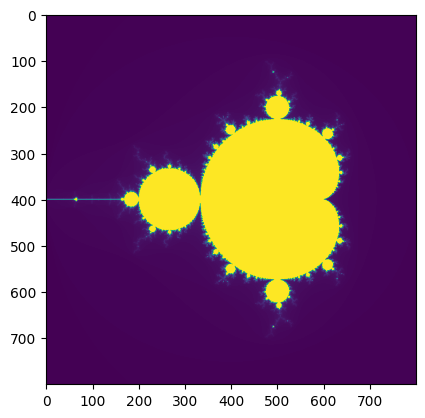

In [4]:
# display the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('mandelbrot.pgm')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Zoom in parameter control
from ipywidgets import interact
def zoom(x1, x2, y1, y2):
    image.generate(x1, x2, y1, y2)
    image.write("mandelbrot.pgm")
    img = mpimg.imread('mandelbrot.pgm')
    imgplot.set_data(img)
    plt.show()


NameError: name 'interact' is not defined